In [1]:
import os
import gdown
from src import config
import seaborn as sns
import matplotlib.pyplot as plt
import pyarrow.parquet as pq
from sklearn import datasets
import pandas as pd

## Data Download

In [2]:
if not os.path.exists(config.DATASET_TRAIN):
    gdown.download(config.DATASET_TRAIN_URL, config.DATASET_TRAIN, quiet=False)

In [3]:
trips = pq.read_table(config.DATASET_TRAIN)
trips = trips.to_pandas()

## Data Exploration

In [4]:
# Dataset dimensions
print("Dataset dimensions:", trips.shape)

Dataset dimensions: (3588295, 19)


In [5]:
# Visualization of the data of the first 5 rows
trips.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-05-01 00:00:36,2022-05-01 00:19:18,1.0,4.1,1.0,N,246,151,2,17.0,3.0,0.5,0.00,0.0,0.3,20.80,2.5,0.0
1,1,2022-05-01 00:27:44,2022-05-01 00:41:33,1.0,2.3,1.0,N,238,74,2,11.0,3.0,0.5,0.00,0.0,0.3,14.80,2.5,0.0
2,1,2022-05-01 00:59:00,2022-05-01 01:14:22,1.0,4.2,1.0,N,163,260,2,15.5,3.0,0.5,0.00,0.0,0.3,19.30,2.5,0.0
3,1,2022-05-01 00:48:18,2022-05-01 01:28:02,1.0,0.0,1.0,N,79,182,1,41.2,0.0,0.5,0.00,0.0,0.3,42.00,0.0,0.0
4,1,2022-05-01 00:28:26,2022-05-01 00:37:49,1.0,1.6,1.0,N,238,75,1,7.5,3.0,0.5,2.25,0.0,0.3,13.55,2.5,0.0


In [6]:
# Show info about the data type of every column
trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3588295 entries, 0 to 3588294
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

In [7]:
# Check for missing values for each column
trips.isnull().sum()

VendorID                      0
tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count          129524
trip_distance                 0
RatecodeID               129524
store_and_fwd_flag       129524
PULocationID                  0
DOLocationID                  0
payment_type                  0
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
improvement_surcharge         0
total_amount                  0
congestion_surcharge     129524
airport_fee              129524
dtype: int64

In [8]:
# Show metrics for numerical columns
trips.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
count,3.588295e+06,3588295,3588295,3.458771e+06,3.588295e+06,3.458771e+06,3.588295e+06,3.588295e+06,3.588295e+06,3.588295e+06,3.588295e+06,3.588295e+06,3.588295e+06,3.588295e+06,3.588295e+06,3.588295e+06,3.458771e+06,3.458771e+06
mean,1.713103e+00,2022-05-16 07:50:29.219312,2022-05-16 08:08:42.275203,1.393923e+00,6.856861e+00,1.365674e+00,1.645738e+02,1.625517e+02,1.183209e+00,1.516813e+01,1.020728e+00,4.891096e-01,2.824744e+00,5.827756e-01,2.964299e-01,2.207840e+01,2.282808e+00,1.008364e-01
min,1.000000e+00,2003-01-01 00:06:06,2003-01-01 00:31:38,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-1.311500e+03,-4.500000e+00,-5.000000e-01,-1.457000e+02,-5.075000e+01,-3.000000e-01,-1.314800e+03,-2.500000e+00,-1.250000e+00
25%,1.000000e+00,2022-05-08 18:14:16.500000,2022-05-08 18:32:36,1.000000e+00,1.150000e+00,1.000000e+00,1.320000e+02,1.130000e+02,1.000000e+00,7.000000e+00,0.000000e+00,5.000000e-01,1.000000e+00,0.000000e+00,3.000000e-01,1.235000e+01,2.500000e+00,0.000000e+00
50%,2.000000e+00,2022-05-16 09:14:42,2022-05-16 09:33:15,1.000000e+00,1.960000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,1.050000e+01,5.000000e-01,5.000000e-01,2.160000e+00,0.000000e+00,3.000000e-01,1.630000e+01,2.500000e+00,0.000000e+00
75%,2.000000e+00,2022-05-23 18:03:17,2022-05-23 18:21:03.500000,1.000000e+00,3.730000e+00,1.000000e+00,2.340000e+02,2.340000e+02,1.000000e+00,1.700000e+01,2.500000e+00,5.000000e-01,3.460000e+00,0.000000e+00,3.000000e-01,2.376000e+01,2.500000e+00,0.000000e+00
max,6.000000e+00,2022-06-01 23:55:30,2022-06-02 00:03:51,9.000000e+00,3.571927e+05,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,6.966500e+03,8.800000e+00,3.300000e+00,6.650000e+02,8.137500e+02,3.000000e-01,6.970800e+03,2.750000e+00,1.250000e+00
std,4.888093e-01,NaN,NaN,9.555489e-01,6.908488e+02,5.239789e+00,6.562813e+01,7.027926e+01,5.075988e-01,1.489484e+01,1.256724e+00,9.008878e-02,3.368739e+00,2.173699e+00,4.576907e-02,1.848683e+01,7.452415e-01,3.434480e-01


In [9]:
# Show metrics for all columns including top and freq of values
trips.describe(include = 'all')

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
count,3.588295e+06,3588295,3588295,3.458771e+06,3.588295e+06,3.458771e+06,3458771,3.588295e+06,3.588295e+06,3.588295e+06,3.588295e+06,3.588295e+06,3.588295e+06,3.588295e+06,3.588295e+06,3.588295e+06,3.588295e+06,3.458771e+06,3.458771e+06
unique,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,3404113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.713103e+00,2022-05-16 07:50:29.219312,2022-05-16 08:08:42.275203,1.393923e+00,6.856861e+00,1.365674e+00,NaN,1.645738e+02,1.625517e+02,1.183209e+00,1.516813e+01,1.020728e+00,4.891096e-01,2.824744e+00,5.827756e-01,2.964299e-01,2.207840e+01,2.282808e+00,1.008364e-01
min,1.000000e+00,2003-01-01 00:06:06,2003-01-01 00:31:38,0.000000e+00,0.000000e+00,1.000000e+00,NaN,1.000000e+00,1.000000e+00,0.000000e+00,-1.311500e+03,-4.500000e+00,-5.000000e-01,-1.457000e+02,-5.075000e+01,-3.000000e-01,-1.314800e+03,-2.500000e+00,-1.250000e+00
25%,1.000000e+00,2022-05-08 18:14:16.500000,2022-05-08 18:32:36,1.000000e+00,1.150000e+00,1.000000e+00,NaN,1.320000e+02,1.130000e+02,1.000000e+00,7.000000e+00,0.000000e+00,5.000000e-01,1.000000e+00,0.000000e+00,3.000000e-01,1.235000e+01,2.500000e+00,0.000000e+00
50%,2.000000e+00,2022-05-16 09:14:42,2022-05-16 09:33:15,1.000000e+00,1.960000e+00,1.000000e+00,NaN,1.620000e+02,1.620000e+02,1.000000e+00,1.050000e+01,5.000000e-01,5.000000e-01,2.160000e+00,0.000000e+00,3.000000e-01,1.630000e+01,2.500000e+00,0.000000e+00
75%,2.000000e+00,2022-05-23 18:03:17,2022-05-23 18:21:03.500000,1.000000e+00,3.730000e+00,1.000000e+00,NaN,2.340000e+02,2.340000e+02,1.000000e+00,1.700000e+01,2.500000e+00,5.000000e-01,3.460000e+00,0.000000e+00,3.000000e-01,2.376000e+01,2.500000e+00,0.000000e+00
max,6.000000e+00,2022-06-01 23:55:30,2022-06-02 00:03:51,9.000000e+00,3.571927e+05,9.900000e+01,NaN,2.650000e+02,2.650000e+02,4.000000e+00,6.966500e+03,8.800000e+00,3.300000e+00,6.650000e+02,8.137500e+02,3.000000e-01,6.970800e+03,2.750000e+00,1.250000e+00


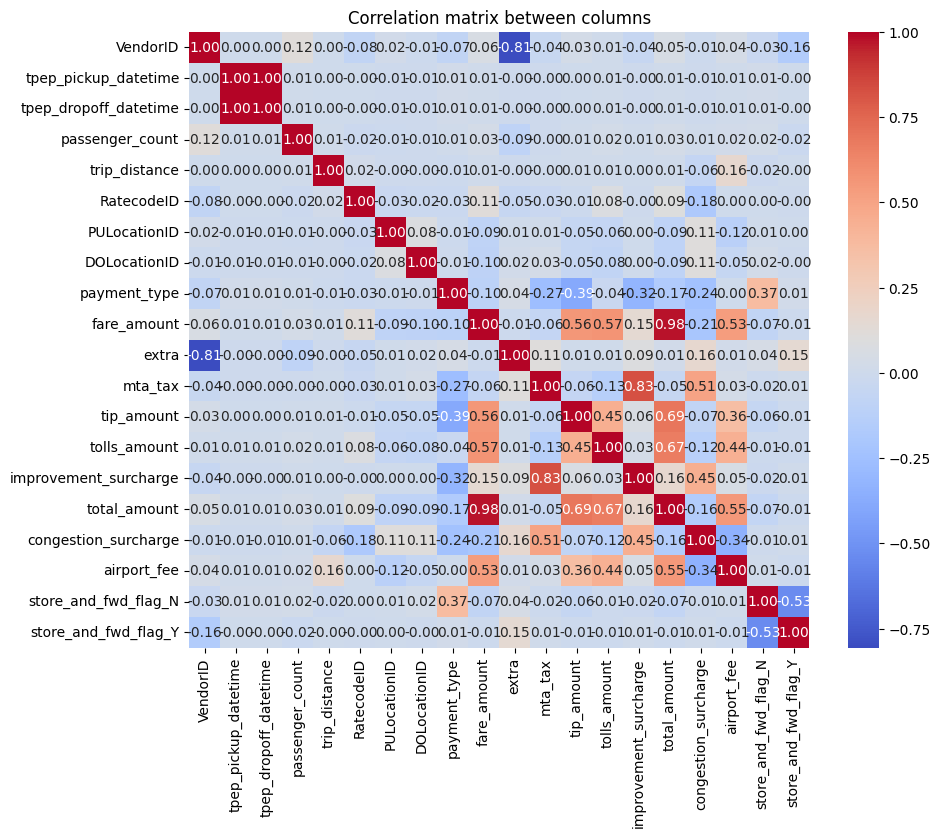

In [10]:
# Calculate the correlation between the columns
data_encoded = pd.get_dummies(trips)
correlation_matrix = data_encoded.corr()

# Visualize the correlation matrix as a heat map
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation matrix between columns')
plt.show()





## Understanding columns with discrete data (limited to a few unique values)

In [11]:
trips.passenger_count.value_counts()


passenger_count
1.0    2549880
2.0     539027
3.0     136997
0.0      73587
5.0      61209
4.0      56092
6.0      41948
7.0         15
8.0         14
9.0          2
Name: count, dtype: int64

In [12]:
trips.airport_fee.value_counts()


airport_fee
 0.00    3175153
 1.25     281317
-1.25       2301
Name: count, dtype: int64

In [13]:
trips.RatecodeID.value_counts()


RatecodeID
1.0     3256985
2.0      147239
5.0       28382
3.0       11636
99.0       9864
4.0        4626
6.0          39
Name: count, dtype: int64

In [14]:
trips.store_and_fwd_flag.value_counts()


store_and_fwd_flag
N    3404113
Y      54658
Name: count, dtype: int64

In [15]:
trips.payment_type.value_counts()

payment_type
1    2720127
2     706333
0     129524
3      16333
4      15978
Name: count, dtype: int64

In [16]:
trips.extra.value_counts()


extra
0.00    1478115
0.50     649518
2.50     506543
1.00     441814
3.00     235008
         ...   
0.05          1
4.80          1
2.51          1
8.55          1
4.82          1
Name: count, Length: 61, dtype: int64

In [17]:
# PULocationID and DOLocationID can have 265 different values
# refer to https://d37ci6vzurychx.cloudfront.net/misc/taxi+_zone_lookup.csv

trips.PULocationID.value_counts()


PULocationID
132    175943
237    173547
236    152419
161    138543
142    120351
        ...  
105         1
221         1
84          1
187         1
199         1
Name: count, Length: 259, dtype: int64

In [18]:
trips.DOLocationID.value_counts()


DOLocationID
236    155644
237    150514
161    130893
230    106293
170    102740
        ...  
30         19
84         18
2           5
105         3
99          2
Name: count, Length: 261, dtype: int64

## Plot every column distribution 

In [19]:
def plot_hist(data, title, xlabel, ylabel):
  sns.histplot(data, bins=50)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(title)
  plt.show()

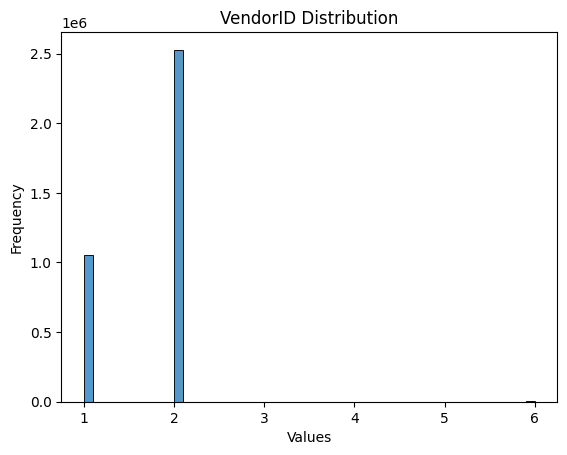

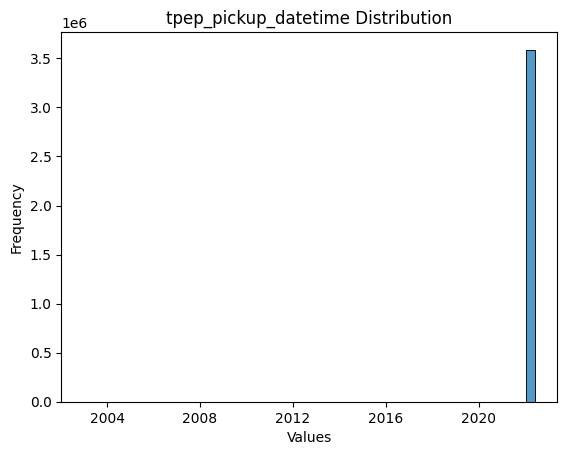

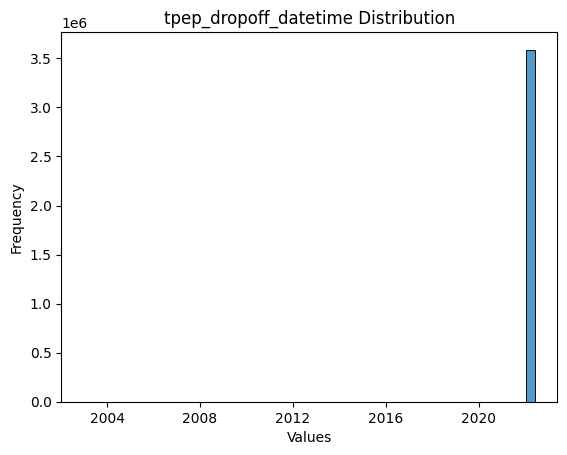

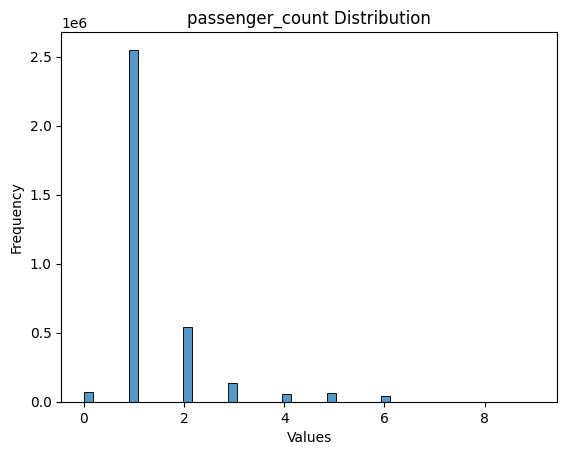

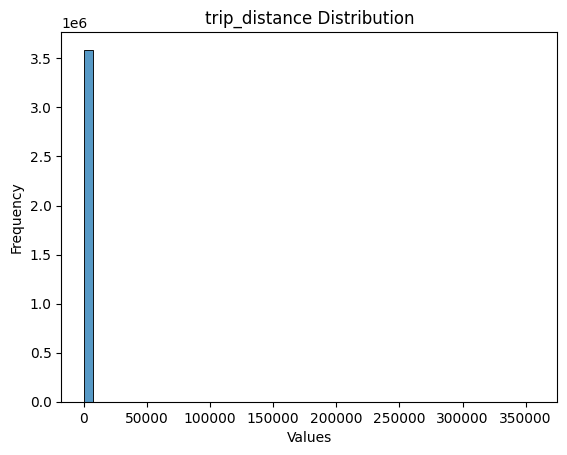

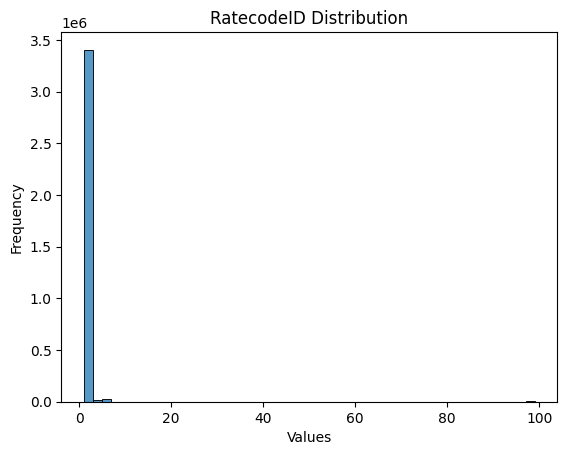

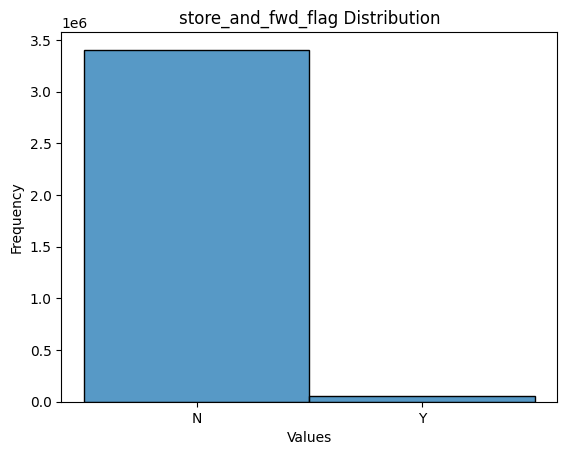

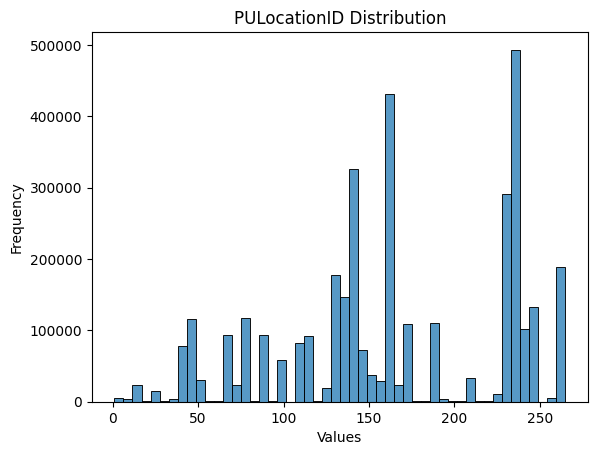

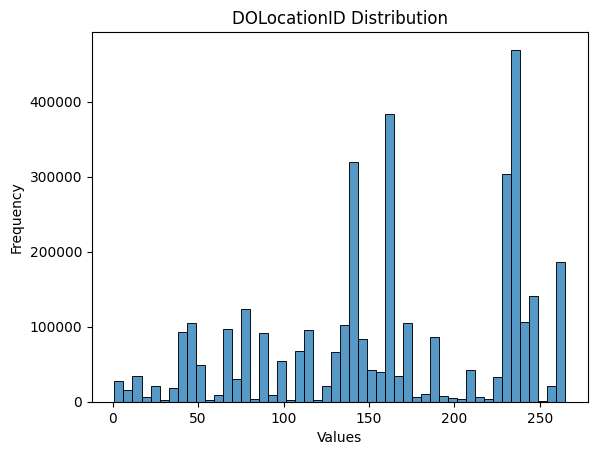

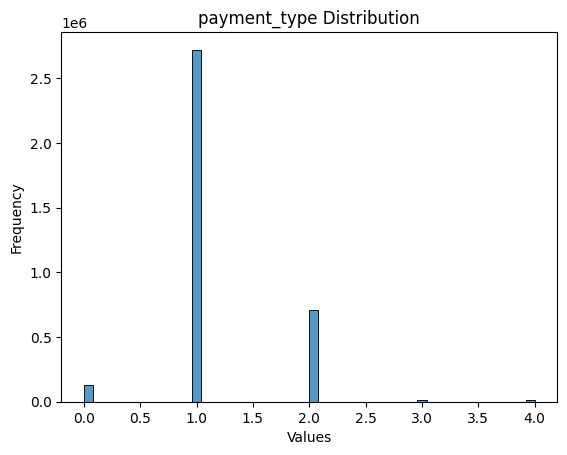

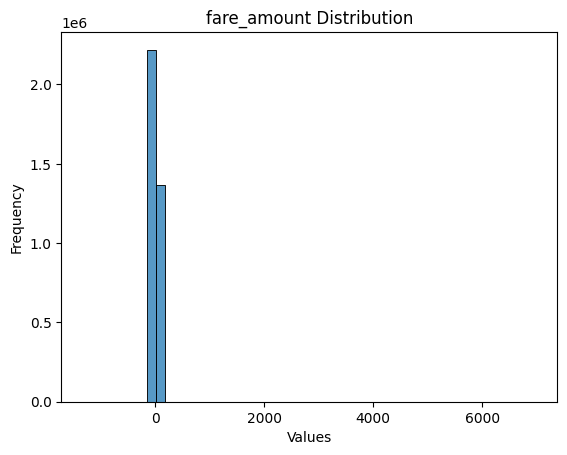

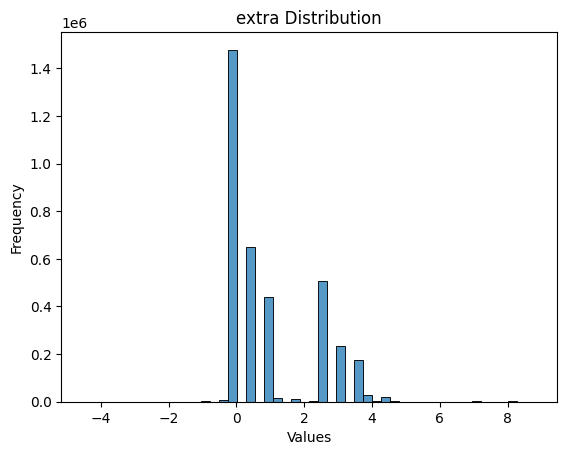

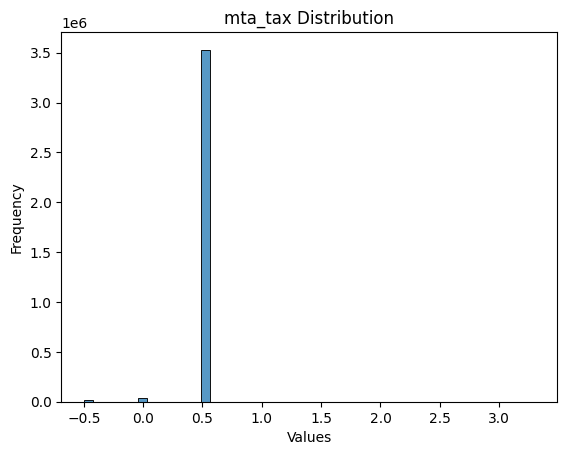

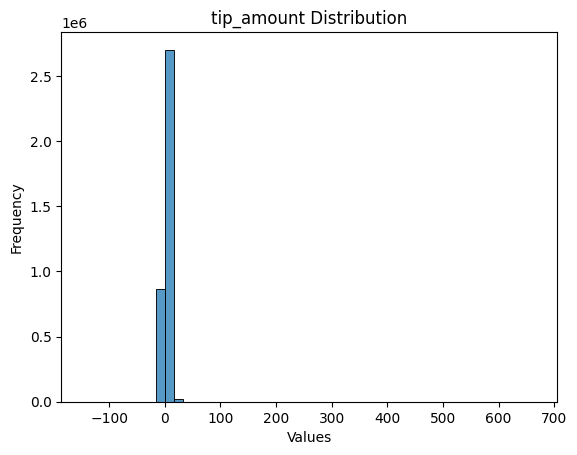

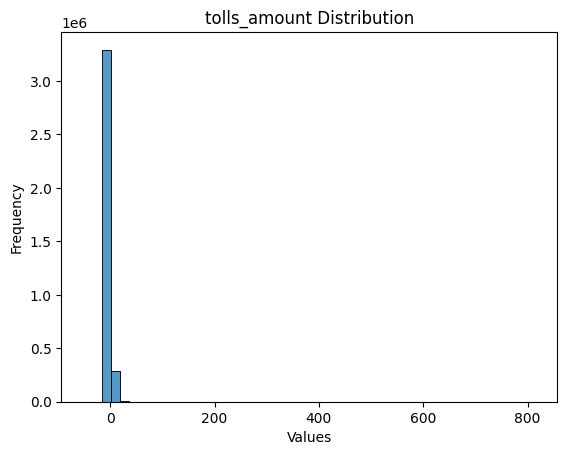

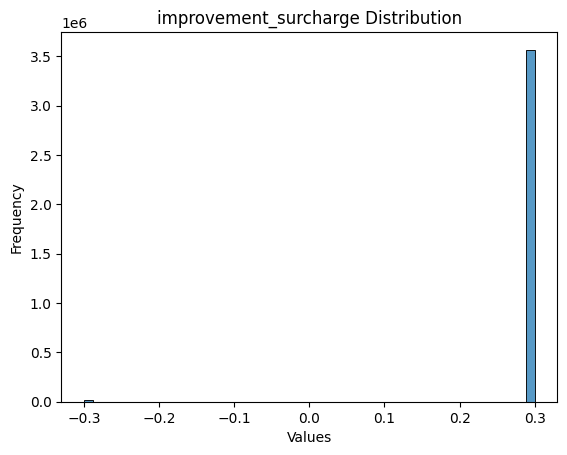

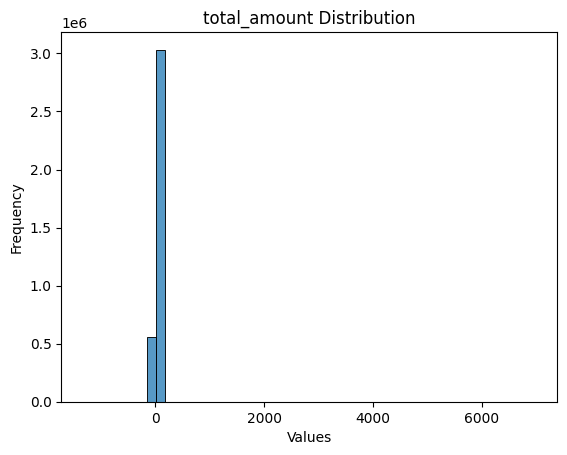

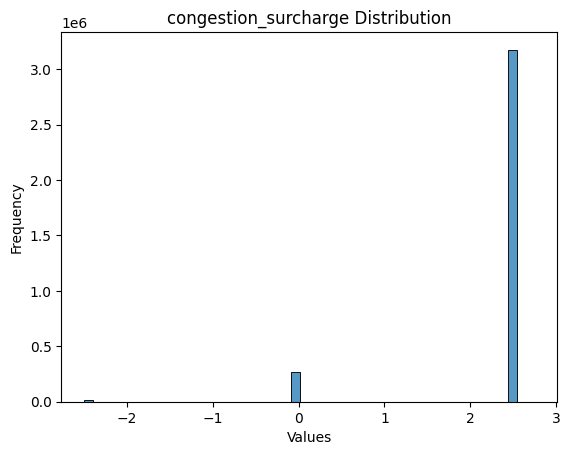

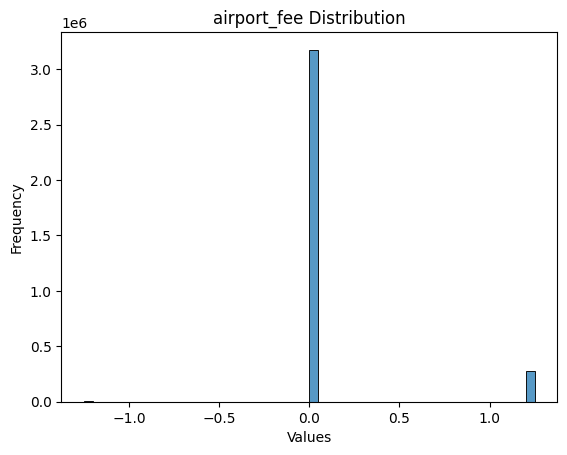

In [20]:
plot_hist(trips['VendorID'], 'VendorID Distribution', 'Values', 'Frequency')
plot_hist(trips['tpep_pickup_datetime'], 'tpep_pickup_datetime Distribution', 'Values', 'Frequency')
plot_hist(trips['tpep_dropoff_datetime'], 'tpep_dropoff_datetime Distribution', 'Values', 'Frequency')
plot_hist(trips['passenger_count'], 'passenger_count Distribution', 'Values', 'Frequency')
plot_hist(trips['trip_distance'], 'trip_distance Distribution', 'Values', 'Frequency')
plot_hist(trips['RatecodeID'], 'RatecodeID Distribution', 'Values', 'Frequency')
plot_hist(trips['store_and_fwd_flag'], 'store_and_fwd_flag Distribution', 'Values', 'Frequency')
plot_hist(trips['PULocationID'], 'PULocationID Distribution', 'Values', 'Frequency')
plot_hist(trips['DOLocationID'], 'DOLocationID Distribution', 'Values', 'Frequency')
plot_hist(trips['payment_type'], 'payment_type Distribution', 'Values', 'Frequency')
plot_hist(trips['fare_amount'], 'fare_amount Distribution', 'Values', 'Frequency')
plot_hist(trips['extra'], 'extra Distribution', 'Values', 'Frequency')
plot_hist(trips['mta_tax'], 'mta_tax Distribution', 'Values', 'Frequency')
plot_hist(trips['tip_amount'], 'tip_amount Distribution', 'Values', 'Frequency')
plot_hist(trips['tolls_amount'], 'tolls_amount Distribution', 'Values', 'Frequency')
plot_hist(trips['improvement_surcharge'], 'improvement_surcharge Distribution', 'Values', 'Frequency')
plot_hist(trips['total_amount'], 'total_amount Distribution', 'Values', 'Frequency')
plot_hist(trips['congestion_surcharge'], 'congestion_surcharge Distribution', 'Values', 'Frequency')
plot_hist(trips['airport_fee'], 'airport_fee Distribution', 'Values', 'Frequency')


## Plot every column distribution with respect to total amount

In [21]:
def plot_scatter(datax,datay, title, xlabel, ylabel):
  plt.scatter(datax, datay)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(title)
  plt.show()


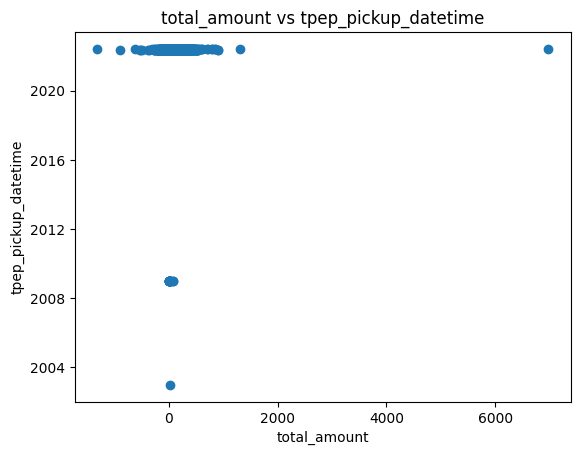

In [22]:
plot_scatter(trips['total_amount'], trips['tpep_pickup_datetime'], 'total_amount vs tpep_pickup_datetime', 'total_amount', 'tpep_pickup_datetime')


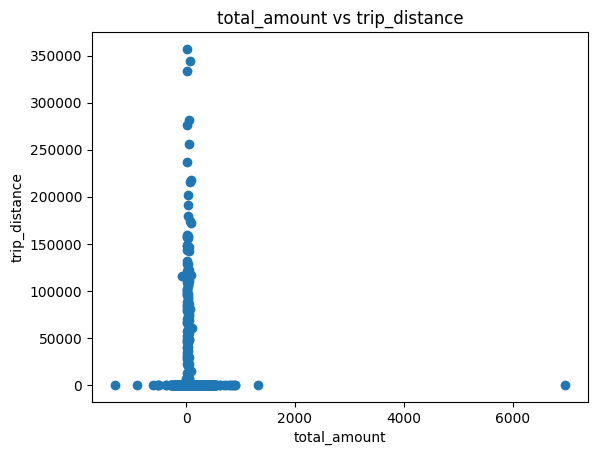

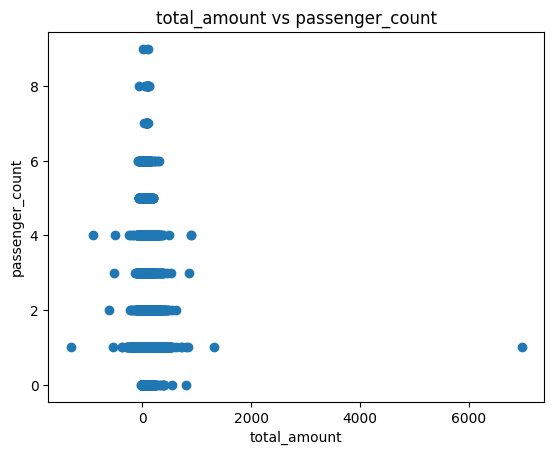

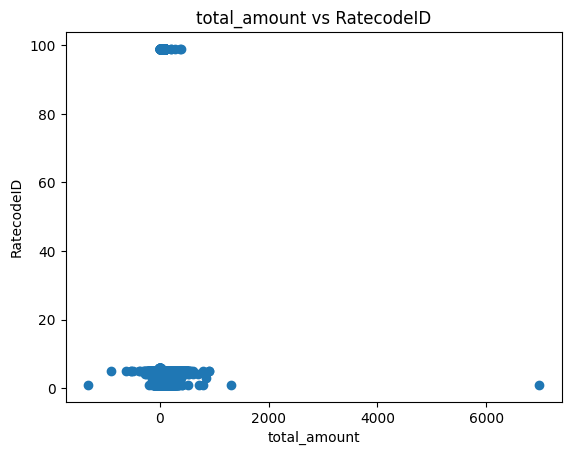

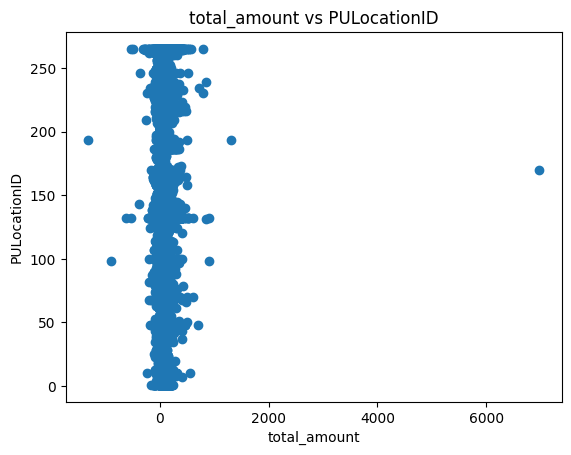

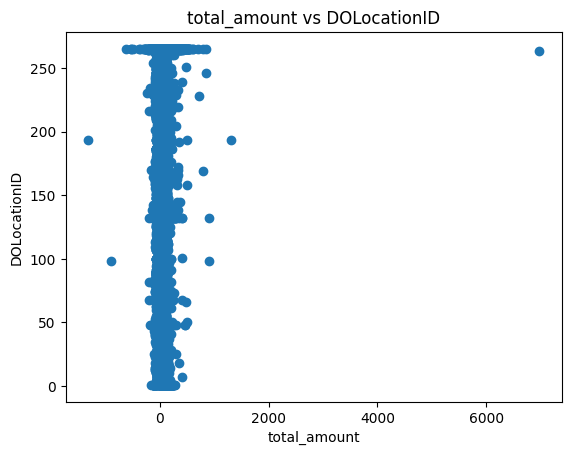

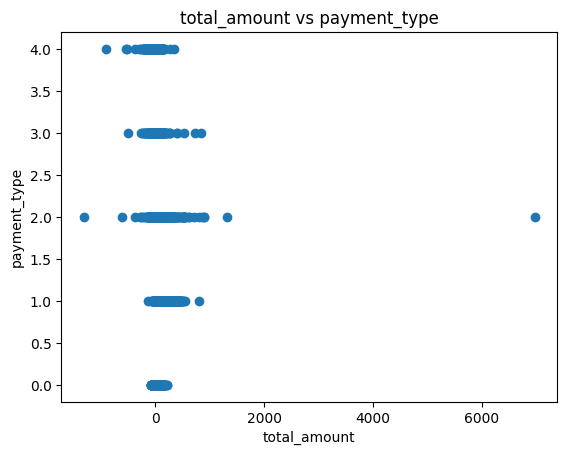

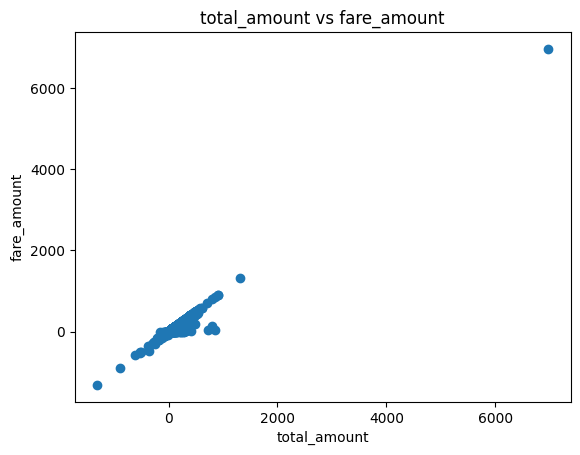

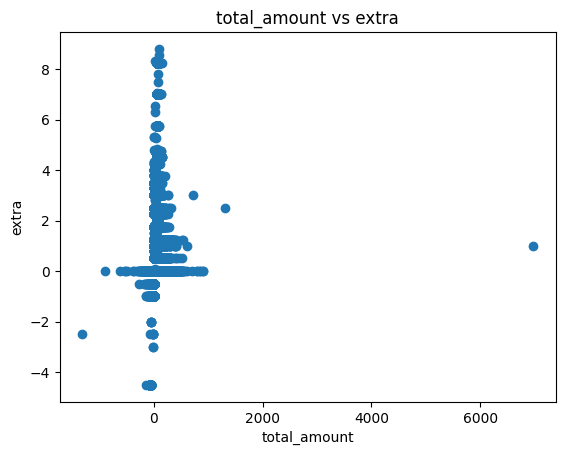

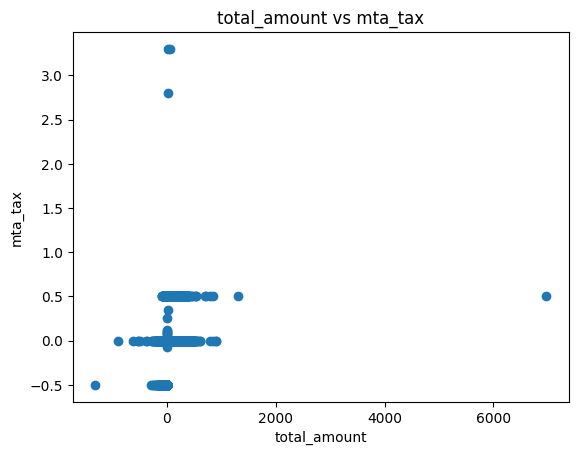

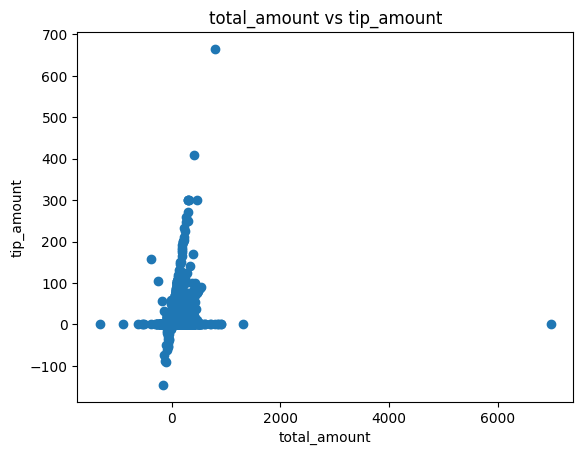

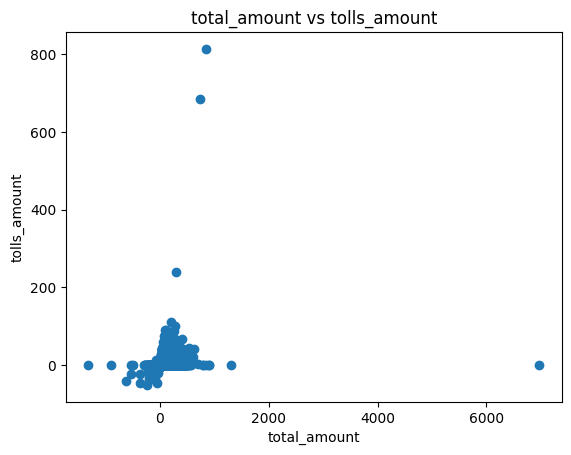

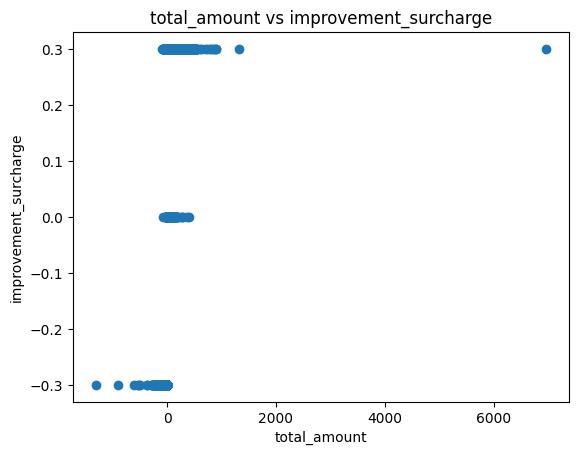

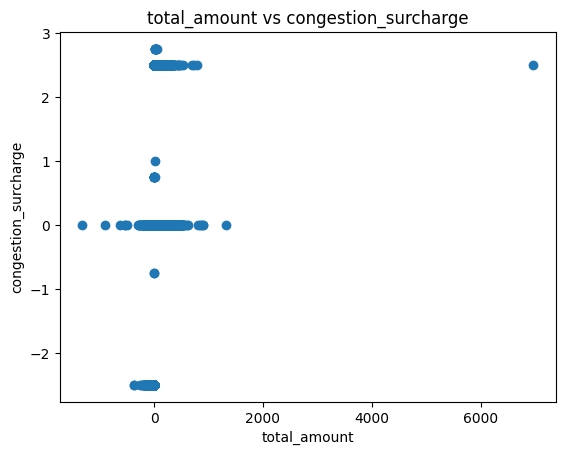

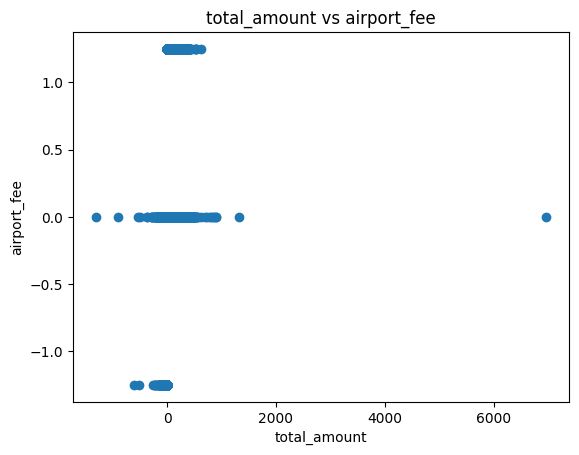

In [23]:
plot_scatter(trips['total_amount'], trips['trip_distance'], 'total_amount vs trip_distance', 'total_amount', 'trip_distance')
plot_scatter(trips['total_amount'], trips['passenger_count'], 'total_amount vs passenger_count', 'total_amount', 'passenger_count')
plot_scatter(trips['total_amount'], trips['RatecodeID'], 'total_amount vs RatecodeID', 'total_amount', 'RatecodeID')
# plot_scatter(trips['total_amount'], trips['store_and_fwd_flag'], 'total_amount vs store_and_fwd_flag', 'total_amount', 'store_and_fwd_flag')

plot_scatter(trips['total_amount'], trips['PULocationID'], 'total_amount vs PULocationID', 'total_amount', 'PULocationID')
plot_scatter(trips['total_amount'], trips['DOLocationID'], 'total_amount vs DOLocationID', 'total_amount', 'DOLocationID')
plot_scatter(trips['total_amount'], trips['payment_type'], 'total_amount vs payment_type', 'total_amount', 'payment_type')
plot_scatter(trips['total_amount'], trips['fare_amount'], 'total_amount vs fare_amount', 'total_amount', 'fare_amount')
plot_scatter(trips['total_amount'], trips['extra'], 'total_amount vs extra', 'total_amount', 'extra')
plot_scatter(trips['total_amount'], trips['mta_tax'], 'total_amount vs mta_tax', 'total_amount', 'mta_tax')
plot_scatter(trips['total_amount'], trips['tip_amount'], 'total_amount vs tip_amount', 'total_amount', 'tip_amount')
plot_scatter(trips['total_amount'], trips['tolls_amount'], 'total_amount vs tolls_amount', 'total_amount', 'tolls_amount')
plot_scatter(trips['total_amount'], trips['improvement_surcharge'], 'total_amount vs improvement_surcharge', 'total_amount', 'improvement_surcharge')
plot_scatter(trips['total_amount'], trips['congestion_surcharge'], 'total_amount vs congestion_surcharge', 'total_amount', 'congestion_surcharge')
plot_scatter(trips['total_amount'], trips['airport_fee'], 'total_amount vs airport_fee', 'total_amount', 'airport_fee')



## Looking into missing values

In [24]:
# Print the number and percentage of missing values in each column
nan_count = trips.isna().sum()
nan_count = nan_count[nan_count > 0]

print('Quantity of missing values')
print(nan_count)
print('______________')


nan_count = (trips.isna().sum() / len(trips)) * 100
nan_count = nan_count[nan_count > 0]
print(nan_count)

# Finding: the quantity of missing values is the same for all the columns where there is missing data
# but they are the same rows?

Quantity of missing values
passenger_count         129524
RatecodeID              129524
store_and_fwd_flag      129524
congestion_surcharge    129524
airport_fee             129524
dtype: int64
______________
passenger_count         3.609625
RatecodeID              3.609625
store_and_fwd_flag      3.609625
congestion_surcharge    3.609625
airport_fee             3.609625
dtype: float64


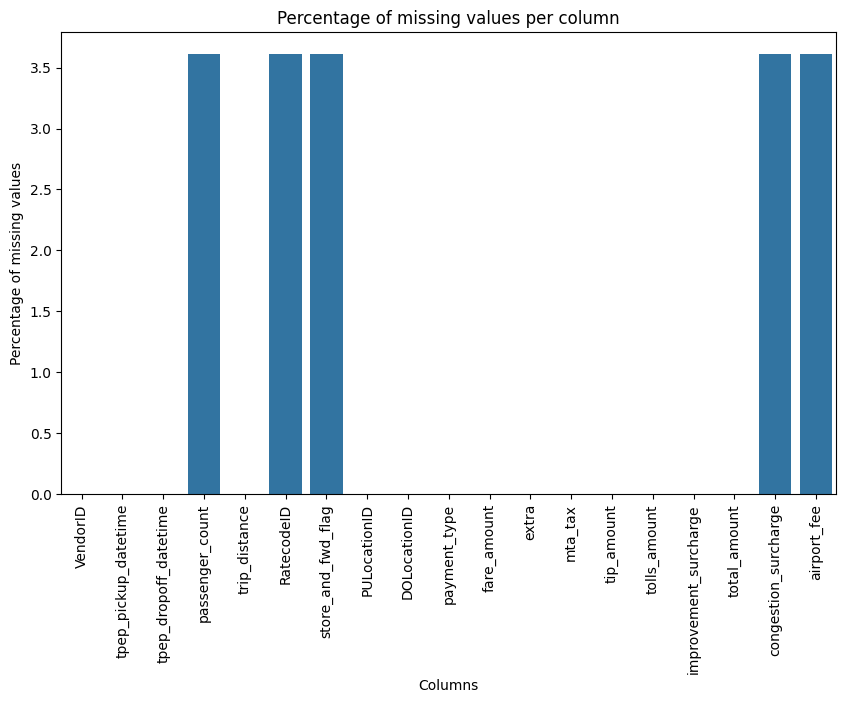

In [25]:
missing_values_percentage = (trips.isnull().sum() / len(trips)) * 100

# Display the percentage of missing values
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values_percentage.index, y=missing_values_percentage)
plt.title('Percentage of missing values ​​per column')
plt.xlabel('Columns')
plt.ylabel('Percentage of missing values')
plt.xticks(rotation=90)
plt.show()

In [26]:
trips_with_missing_values = trips[trips.isnull().any(axis=1)]
trips_with_missing_values.head()


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
3458771,2,2022-05-01 00:01:17,2022-05-01 00:18:38,NaN,4.93,NaN,None,166,163,0,23.21,0.0,0.5,2.94,0.0,0.3,29.45,NaN,NaN
3458772,2,2022-05-01 00:40:00,2022-05-01 00:50:00,NaN,1.48,NaN,None,190,97,0,10.00,0.0,0.5,2.38,0.0,0.3,13.18,NaN,NaN
3458773,1,2022-05-01 00:08:38,2022-05-01 00:28:26,NaN,3.90,NaN,None,239,234,0,16.50,0.5,0.5,4.06,0.0,0.3,24.36,NaN,NaN
3458774,2,2022-05-01 00:34:59,2022-05-01 01:12:00,NaN,13.16,NaN,None,61,151,0,43.79,0.0,0.5,10.53,0.0,0.3,57.62,NaN,NaN
3458775,2,2022-05-01 00:12:00,2022-05-01 00:25:00,NaN,4.29,NaN,None,79,262,0,17.65,0.0,0.5,3.00,0.0,0.3,23.95,NaN,NaN


In [27]:
# Validate that empty (NaN) values ​​in multiple columns belong to the same rows
columns_to_validate = ['passenger_count', 'RatecodeID', 'store_and_fwd_flag', 'congestion_surcharge', 'airport_fee']

# Create a new column indicating whether all columns are empty in a specific row
trips['empty_columns'] = trips[columns_to_validate].isnull().all(axis=1)

# Check for rows where all columns are empty
rows_with_empty_values = trips[trips['empty_columns'] == True]

# Imprimir el numero de filas con valores vacíos en las columnas especificadas
print(rows_with_empty_values.empty_columns.value_counts())

# The number of rows with empty values in the specified columns is 129524, so we can say all 
# rows with missing values in the columns are the same

empty_columns
True    129524
Name: count, dtype: int64


In [28]:
# All rows have the same value for the payment_type column, they seems to be canceled trips
# In Documentation, payment method valid values are only from 1 to 6
# So we can assume that the value 0 is a missing value

# Also, 
print(rows_with_empty_values.payment_type.value_counts().sort_index())
rows_with_empty_values.head(5).T

payment_type
0    129524
Name: count, dtype: int64


,3458771,3458772,3458773,3458774,3458775
VendorID,2,2,1,2,2
tpep_pickup_datetime,2022-05-01 00:01:17,2022-05-01 00:40:00,2022-05-01 00:08:38,2022-05-01 00:34:59,2022-05-01 00:12:00
tpep_dropoff_datetime,2022-05-01 00:18:38,2022-05-01 00:50:00,2022-05-01 00:28:26,2022-05-01 01:12:00,2022-05-01 00:25:00
passenger_count,NaN,NaN,NaN,NaN,NaN
trip_distance,4.93,1.48,3.9,13.16,4.29
RatecodeID,NaN,NaN,NaN,NaN,NaN
store_and_fwd_flag,None,None,None,None,None
PULocationID,166,190,239,61,79
DOLocationID,163,97,234,151,262
payment_type,0,0,0,0,0
